## Perform Sentiment Analysis

In [1]:
import os
import pandas as pd

# Initialize a dictionary to store DataFrames
dataframes = {}

# Get the current working directory
directory_path = os.getcwd()

# Iterate over all files in the current directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):  # Only process CSV files
        file_path = os.path.join(directory_path, filename)
        # Use the filename without the extension as the key
        file_key = os.path.splitext(filename)[0]
        # Load the CSV file into a DataFrame and store it in the dictionary
        dataframes[file_key] = pd.read_csv(file_path)
        print(f"Loaded {filename} as {file_key}")



Loaded 3sentimentAnalysisWithHistEvil_1_characterRelationshipPrompt_without_history.csv as 3sentimentAnalysisWithHistEvil_1_characterRelationshipPrompt_without_history
Loaded 3sentimentAnalysisWithHistEvil_1_without_history.csv as 3sentimentAnalysisWithHistEvil_1_without_history
Loaded 3sentimentAnalysisWithHistEvil_2_characterRelationshipPrompt_without_history.csv as 3sentimentAnalysisWithHistEvil_2_characterRelationshipPrompt_without_history
Loaded 3sentimentAnalysisWithHistEvil_2_without_history.csv as 3sentimentAnalysisWithHistEvil_2_without_history
Loaded sentimentAnalysisEvil_2_without_history.csv as sentimentAnalysisEvil_2_without_history
Loaded sentimentAnalysis_1_without_history.csv as sentimentAnalysis_1_without_history


In [2]:
import spacy
from textblob import TextBlob

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to perform sentiment analysis on each utterance in the "Details" column using TextBlob
def analyze_sentiments(details):
    # Split the details by the semicolon to separate each utterance
    utterances = details.split(";")
    sentiments = []
    for utterance in utterances:
        if utterance.strip():  # Ensure the utterance is not just whitespace
            # Split the utterance into speaker and message
            if ":" in utterance:
                speaker, message = utterance.split(":", 1)
                speaker = speaker.strip()  # Remove any leading/trailing whitespace from the speaker's name
                message = message.strip()  # Remove any leading/trailing whitespace from the message
            else:
                # If no speaker is found, assume it's just a message
                speaker = "Unknown"
                message = utterance.strip()
            
            # Process the message with spaCy
            doc = nlp(message)
            # Compute sentiment score using TextBlob
            sentiment = TextBlob(doc.text).sentiment
            score = {
                'speaker': speaker,
                'polarity': sentiment.polarity,
                'subjectivity': sentiment.subjectivity
            }
            sentiments.append((message, score))

    return sentiments

# Assuming 'dataframes' is a dictionary of pandas DataFrames
for df_name, df in dataframes.items():
    dataframes[df_name]['SentimentAnalysis'] = df['Details'].apply(analyze_sentiments)
    print(dataframes[df_name][['SentimentAnalysis']])

                                    SentimentAnalysis
0   [(You think you can just steal from me and get...
1   [(You think you can just steal from me and get...
2   [(You think you can steal from me and get away...
3   [(Why did you steal my money, Klaus? You are a...
4   [(You think you can just steal from me and get...
5   [(I haven't forgotten what you did, Klaus. You...
6   [(I still haven't forgotten what you did, Klau...
7   [(You think you're so clever stealing from me,...
8   [(You think you can just steal from me and get...
9   [(You know, Klaus, I haven't forgotten about t...
10  [(I know what you did, Klaus. You stole my mon...
11  [(You have some nerve showing your face here a...
12  [(I can't believe you have the nerve to show y...
13  [(You think you can just steal from me and get...
14  [(I know what you did, Klaus. I haven't forgot...
15  [(I haven't forgotten what you did to me, Klau...
16  [(You think you can just steal from me and get...
17  [(You think you can just

In [3]:
utterances_data = []

# Assuming 'dataframes' is a dictionary of pandas DataFrames
for source, df in dataframes.items():
    df.reset_index(inplace=True)  # Ensure each conversation has a unique ID based on its index
    # Apply sentiment analysis to the "Details" column
    df['SentimentAnalysis'] = df['Details'].apply(analyze_sentiments)
    
    # Process each row in the DataFrame
    for index, row in df.iterrows():
        if 'SentimentAnalysis' in row and isinstance(row['SentimentAnalysis'], list):
            utterance_order = 1  # Initialize order for each new conversation
            for sentiment_analysis in row['SentimentAnalysis']:
                utterance, sentiment = sentiment_analysis
                polarity = sentiment["polarity"]
                subjectivity = sentiment["subjectivity"]
                
                # Extract speaker's name and utterance text
                speaker_name = sentiment['speaker']
                utterance_text = utterance
                
                # Append the data including the order of the utterance within the conversation
                utterances_data.append({
                    "Subject": f"{speaker_name}_{source}",
                    "Source": source,  # Adding the source here
                    "Utterance": utterance_text,
                    "Polarity" : polarity,
                    "Subjectivity"  :subjectivity,
                    "Conversation_ID": F"{index}_{source}",  
                    "UtteranceOrder": utterance_order,
                })
                utterance_order += 1  # Increment order for the next utterance in the same conversation

# Convert the list to a DataFrame
utterances_df = pd.DataFrame(utterances_data)

# Display the first few rows of the combined DataFrame
print(utterances_df.head())


                                             Subject  \
0  Maria Lopez_3sentimentAnalysisWithHistEvil_1_c...   
1  Klaus Mueller_3sentimentAnalysisWithHistEvil_1...   
2  Maria Lopez_3sentimentAnalysisWithHistEvil_1_c...   
3  Klaus Mueller_3sentimentAnalysisWithHistEvil_1...   
4  Maria Lopez_3sentimentAnalysisWithHistEvil_1_c...   

                                              Source  \
0  3sentimentAnalysisWithHistEvil_1_characterRela...   
1  3sentimentAnalysisWithHistEvil_1_characterRela...   
2  3sentimentAnalysisWithHistEvil_1_characterRela...   
3  3sentimentAnalysisWithHistEvil_1_characterRela...   
4  3sentimentAnalysisWithHistEvil_1_characterRela...   

                                           Utterance  Polarity  Subjectivity  \
0  You think you can just steal from me and get a...     0.000      0.000000   
1  I didn't steal anything from you, Maria. Why w...     0.000      0.500000   
2  Oh, please, don't play innocent with me. You k...     0.375      0.475000   
3  I h

In [4]:
utterances_df.groupby("Source")["Polarity"].describe()

,count,mean,std,min,25%,50%,75%,max
Source,,,,,,,,
3sentimentAnalysisWithHistEvil_1_characterRelationshipPrompt_without_history,581.0,0.083844,0.246477,-1.0,0.0,0.000000,0.226190,0.625
3sentimentAnalysisWithHistEvil_1_without_history,658.0,0.180856,0.281697,-0.5,0.0,0.072222,0.300000,1.000
3sentimentAnalysisWithHistEvil_2_characterRelationshipPrompt_without_history,598.0,0.073673,0.253084,-1.0,0.0,0.000000,0.200000,0.650
3sentimentAnalysisWithHistEvil_2_without_history,672.0,0.225124,0.309180,-0.5,0.0,0.185417,0.434375,1.000
sentimentAnalysisEvil_2_without_history,611.0,0.354102,0.338194,-0.3,0.0,0.325758,0.566667,1.000
sentimentAnalysis_1_without_history,700.0,0.336616,0.324746,-0.4,0.0,0.266667,0.500000,1.000


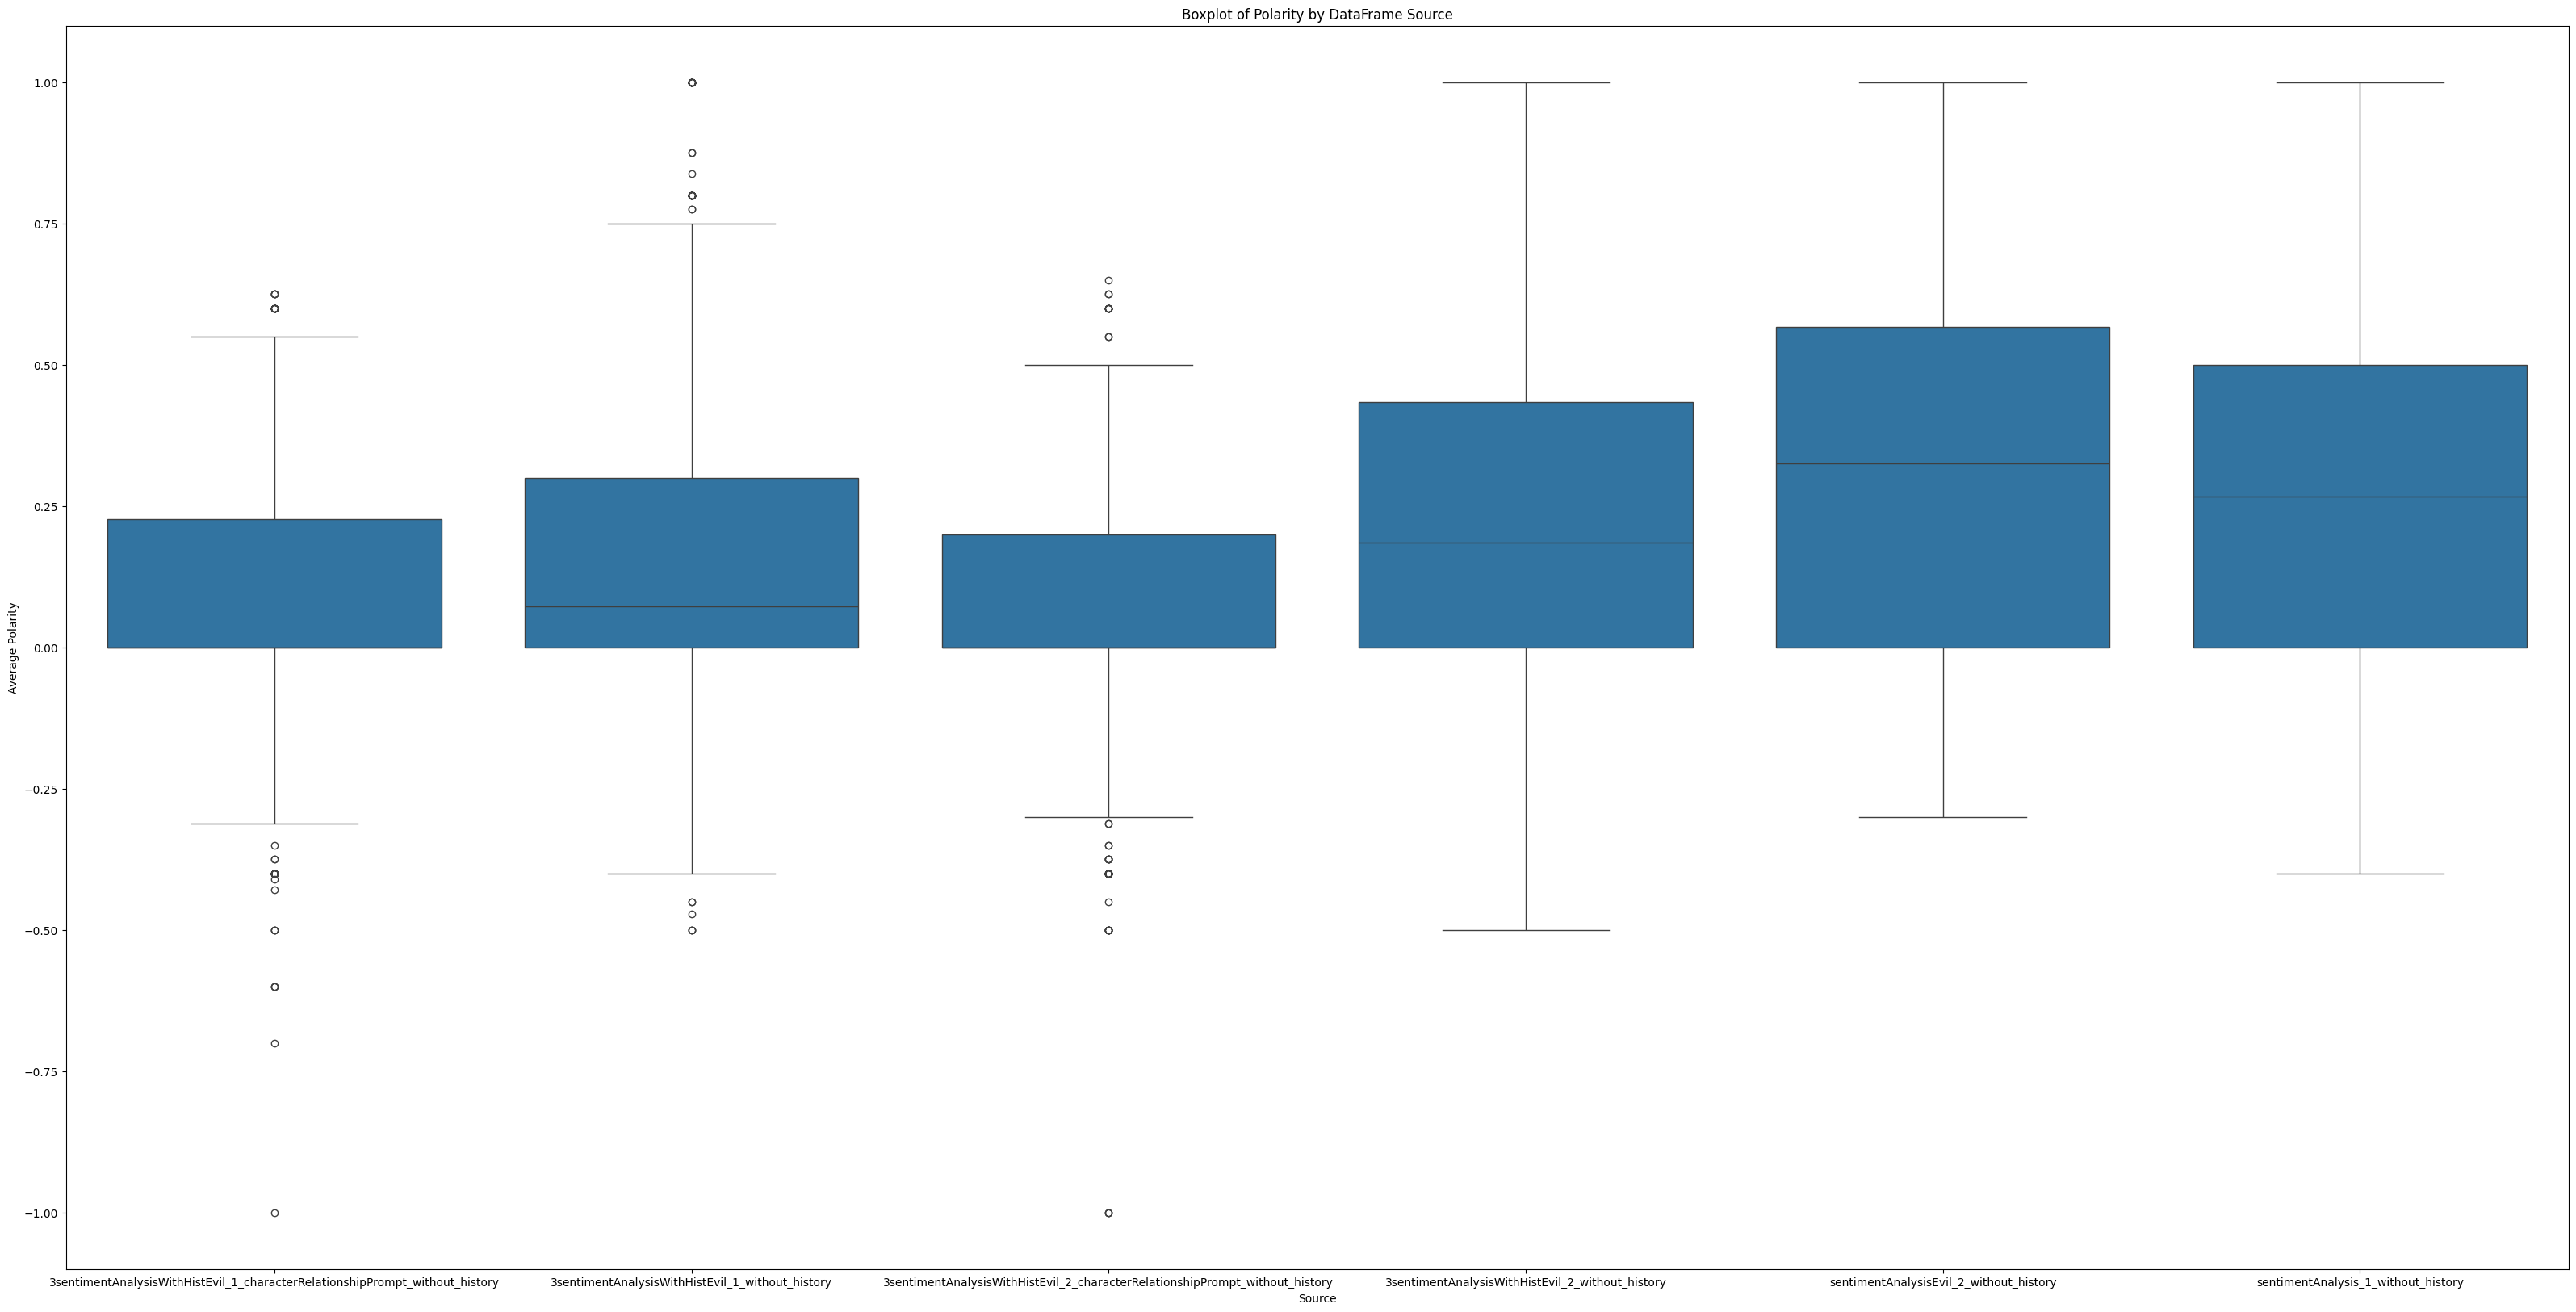

In [5]:
# Create a boxplot of average polarity by source
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40, 20))
sns.boxplot(x='Source', y='Polarity', data=utterances_df)
plt.title('Boxplot of Polarity by DataFrame Source')
plt.xlabel('Source')
plt.ylabel('Average Polarity')
plt.show()

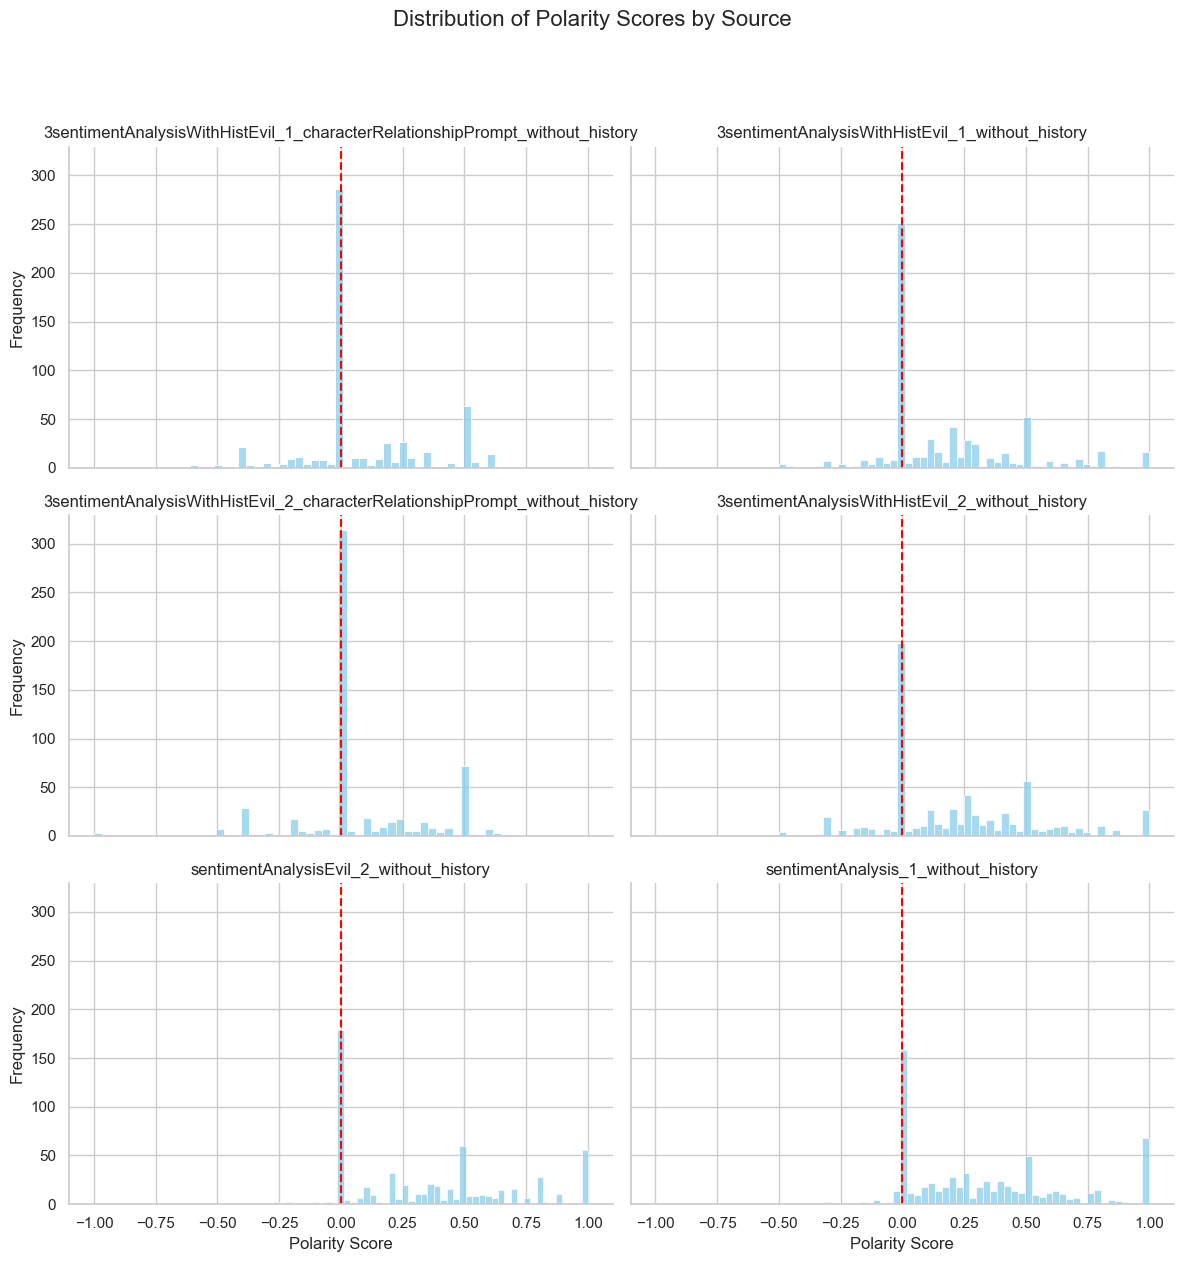

In [6]:

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a FacetGrid to generate a histogram for each source
g = sns.FacetGrid(utterances_df, col="Source", col_wrap=2, height=4, aspect=1.5)
g.map(sns.histplot, 'Polarity', bins=50, kde=False, color='skyblue')

# Adding a title and adjusting spacing
g.fig.suptitle('Distribution of Polarity Scores by Source', fontsize=16, y=1.05)
g.set_titles('{col_name}')  # Set each subplot title to the name of the source
g.set_axis_labels('Polarity Score', 'Frequency')

# Adding a vertical line at x=0 on each subplot
for ax in g.axes.ravel():
    ax.axvline(x=0, color='red', linestyle='--')

# Adjusting the layout
plt.tight_layout()
plt.show()



In [9]:
#dataframes["sentimentAnalysisEvil_1_without_history"]["SentimentAnalysis"][1]

## ANOVA
- to be anle to use ANOVA we use the average polarity score per conversation -> decorrelate data

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

# Assuming 'dataframes' is a dictionary of pandas DataFrames
def average_polarity(sentiments):
    polarity_scores = [sentiment[1]['polarity'] for sentiment in sentiments]
    if polarity_scores:
        return sum(polarity_scores) / len(polarity_scores)
    else:
        return None

# Step 1: Calculate the Average Polarity
for df_name, df in dataframes.items():
    df['SentimentAnalysis'] = df['Details'].apply(analyze_sentiments)
    df['AveragePolarity'] = df['SentimentAnalysis'].apply(average_polarity)
    df['Source'] = df_name

# Step 2: Combine the Data
all_data = [df[['Source', 'AveragePolarity']] for df_name, df in dataframes.items()]
combined_df = pd.concat(all_data, ignore_index=True)

# Ensure there are no missing values in AveragePolarity
combined_df = combined_df.dropna(subset=['AveragePolarity'])

# Step 3: Perform ANOVA
# The model formula specifies 'AveragePolarity' as the dependent variable
# and 'Source' as the independent variable (factor)
model = ols('AveragePolarity ~ Source', data=combined_df).fit()

# Generate the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)


            sum_sq     df          F        PR(>F)
Source    3.591049    5.0  67.309926  1.037558e-46
Residual  3.137036  294.0        NaN           NaN


There is a significant difference between the groups, now we need to find out which groups lead to this difference

## Seperate t-test between all groups and reference group (Sentiment Analysis 1 without history)

To check which groups differ after getting a positive ANOVA result, you can perform a follow up test or "post-hoc test".

One post-hoc test is to perform a separate t-test for each pair of groups. You can perform a t-test between all pairs using by running each pair through the stats.ttest_ind() we covered in the lesson on t-tests:

In [14]:
import pandas as pd
import scipy.stats as stats

# Step 1: Calculate the Average Polarity (as before)
def average_polarity(sentiments):
    polarity_scores = [sentiment[1]['polarity'] for sentiment in sentiments]
    if polarity_scores:
        return sum(polarity_scores) / len(polarity_scores)
    else:
        return None

# Assuming 'dataframes' is a dictionary of pandas DataFrames
for df_name, df in dataframes.items():
    df['SentimentAnalysis'] = df['Details'].apply(analyze_sentiments)
    df['AveragePolarity'] = df['SentimentAnalysis'].apply(average_polarity)
    df['Source'] = df_name

# Step 2: Combine the Data
all_data = [df[['Source', 'AveragePolarity']] for df_name, df in dataframes.items()]
combined_df = pd.concat(all_data, ignore_index=True)

# Ensure there are no missing values in AveragePolarity
combined_df = combined_df.dropna(subset=['AveragePolarity'])

# Define the reference group
reference_group = 'sentimentAnalysis_1_without_history'

# Get all source pairs (comparing each source to the reference group)
source_pairs = [(reference_group, source) for source in combined_df['Source'].unique() if source != reference_group]

# Conduct t-tests on each pair
for ref, source in source_pairs: 
    print(f"Comparing {ref} with {source}")
    t_stat, p_value = stats.ttest_ind(
        combined_df[combined_df['Source'] == ref]['AveragePolarity'],
        combined_df[combined_df['Source'] == source]['AveragePolarity']
    )
    print(f"T-statistic: {t_stat}, P-value: {p_value}\n")


Comparing sentimentAnalysis_1_without_history with 3sentimentAnalysisWithHistEvil_1_characterRelationshipPrompt_without_history
T-statistic: 13.652130049316813, P-value: 2.1071190780310222e-24

Comparing sentimentAnalysis_1_without_history with 3sentimentAnalysisWithHistEvil_1_without_history
T-statistic: 6.4428448872308675, P-value: 4.396460197630786e-09

Comparing sentimentAnalysis_1_without_history with 3sentimentAnalysisWithHistEvil_2_characterRelationshipPrompt_without_history
T-statistic: 14.316035936738801, P-value: 9.35421292366487e-26

Comparing sentimentAnalysis_1_without_history with 3sentimentAnalysisWithHistEvil_2_without_history
T-statistic: 4.947429112876311, P-value: 3.121173788060231e-06

Comparing sentimentAnalysis_1_without_history with sentimentAnalysisEvil_2_without_history
T-statistic: -0.3659302537070019, P-value: 0.7152058503702295



In [12]:
import pandas as pd
import scipy.stats as stats

# Step 1: Calculate the Average Polarity (as before)
def average_polarity(sentiments):
    polarity_scores = [sentiment[1]['polarity'] for sentiment in sentiments]
    if polarity_scores:
        return sum(polarity_scores) / len(polarity_scores)
    else:
        return None

# Assuming 'dataframes' is a dictionary of pandas DataFrames
for df_name, df in dataframes.items():
    df['SentimentAnalysis'] = df['Details'].apply(analyze_sentiments)
    df['AveragePolarity'] = df['SentimentAnalysis'].apply(average_polarity)
    df['Source'] = df_name

# Step 2: Combine the Data
all_data = [df[['Source', 'AveragePolarity']] for df_name, df in dataframes.items()]
combined_df = pd.concat(all_data, ignore_index=True)

# Ensure there are no missing values in AveragePolarity
combined_df = combined_df.dropna(subset=['AveragePolarity'])

# Print results in the specified format

print("Normal Simulations:")
print("Without history:")
for ref, source in [
    ('sentimentAnalysis_1_without_history', 'sentimentAnalysisEvil_1_without_history'),
    ('sentimentAnalysis_1_without_history', 'sentimentAnalysisEvil_2_without_history')
]:
    print(f"Comparing {ref} with {source}")
    t_stat, p_value = stats.ttest_ind(
        combined_df[combined_df['Source'] == ref]['AveragePolarity'],
        combined_df[combined_df['Source'] == source]['AveragePolarity']
    )
    print(f"T-statistic: {t_stat}, P-value: {p_value}\n")

print("With history:")
for ref, source in [
    ('sentimentAnalysis_1_without_history', 'sentimentAnalysisEvil_1_with_history'),
    ('sentimentAnalysis_1_without_history', 'sentimentAnalysisEvil_2_with_history')
]:
    print(f"Comparing {ref} with {source}")
    t_stat, p_value = stats.ttest_ind(
        combined_df[combined_df['Source'] == ref]['AveragePolarity'],
        combined_df[combined_df['Source'] == source]['AveragePolarity']
    )
    print(f"T-statistic: {t_stat}, P-value: {p_value}\n")

print("Early history:")
for ref, source in [
    ('sentimentAnalysis_1_without_history', 'sentimentAnalysisWithHistEvil_1_without_history'),
    ('sentimentAnalysis_1_without_history', 'sentimentAnalysisWithHistEvil_2_without_history')
]:
    print(f"Comparing {ref} with {source}")
    t_stat, p_value = stats.ttest_ind(
        combined_df[combined_df['Source'] == ref]['AveragePolarity'],
        combined_df[combined_df['Source'] == source]['AveragePolarity']
    )
    print(f"T-statistic: {t_stat}, P-value: {p_value}\n")

print("Character Prompt:")
print("Without history:")
for ref, source in [
    ('sentimentAnalysis_1_without_history', 'sentimentAnalysisEvil_1_characterPrompt_without_history'),
    ('sentimentAnalysis_1_without_history', 'sentimentAnalysisEvil_2_characterPrompt_without_history')
]:
    print(f"Comparing {ref} with {source}")
    t_stat, p_value = stats.ttest_ind(
        combined_df[combined_df['Source'] == ref]['AveragePolarity'],
        combined_df[combined_df['Source'] == source]['AveragePolarity']
    )
    print(f"T-statistic: {t_stat}, P-value: {p_value}\n")

print("With history:")
for ref, source in [
    ('sentimentAnalysis_1_without_history', 'sentimentAnalysisEvil_1_characterPrompt_with_history')
]:
    print(f"Comparing {ref} with {source}")
    t_stat, p_value = stats.ttest_ind(
        combined_df[combined_df['Source'] == ref]['AveragePolarity'],
        combined_df[combined_df['Source'] == source]['AveragePolarity']
    )
    print(f"T-statistic: {t_stat}, P-value: {p_value}\n")

print("Relationship Prompt:")
print("Early history:")
for ref, source in [
    ('sentimentAnalysis_1_without_history', 'sentimentAnalysisEvil_2_characterRelationshipPrompt_without_history'),
    ('sentimentAnalysis_1_without_history', 'sentimentAnalysisEvil_2_characterRelationshipPrompt_with_history'),
    ('sentimentAnalysis_1_without_history', 'sentimentAnalysisWithHistEvil_1_characterRelationshipPrompt_without_history'),
    ('sentimentAnalysis_1_without_history', 'sentimentAnalysisWithHistEvil_2_characterRelationshipPrompt_without_history')
]:
    print(f"Comparing {ref} with {source}")
    t_stat, p_value = stats.ttest_ind(
        combined_df[combined_df['Source'] == ref]['AveragePolarity'],
        combined_df[combined_df['Source'] == source]['AveragePolarity']
    )
    print(f"T-statistic: {t_stat}, P-value: {p_value}\n")


Normal Simulations:
Without history:
Comparing sentimentAnalysis_1_without_history with sentimentAnalysisEvil_1_without_history
T-statistic: nan, P-value: nan

Comparing sentimentAnalysis_1_without_history with sentimentAnalysisEvil_2_without_history
T-statistic: -0.3659302537070019, P-value: 0.7152058503702295

With history:
Comparing sentimentAnalysis_1_without_history with sentimentAnalysisEvil_1_with_history
T-statistic: nan, P-value: nan

Comparing sentimentAnalysis_1_without_history with sentimentAnalysisEvil_2_with_history
T-statistic: nan, P-value: nan

Early history:
Comparing sentimentAnalysis_1_without_history with sentimentAnalysisWithHistEvil_1_without_history
T-statistic: nan, P-value: nan

Comparing sentimentAnalysis_1_without_history with sentimentAnalysisWithHistEvil_2_without_history
T-statistic: nan, P-value: nan

Character Prompt:
Without history:
Comparing sentimentAnalysis_1_without_history with sentimentAnalysisEvil_1_characterPrompt_without_history
T-statistic: 

significant results


- sentimentAnalysis_1_without_history vs. sentimentAnalysisEvil_1_with_history: significant 
- Comparing sentimentAnalysis_1_without_history with sentimentAnalysisEvil_2_with_history
- Comparing sentimentAnalysis_1_without_history with sentimentAnalysis_2_without_history


https://www.kaggle.com/code/hamelg/python-for-data-26-anova

## Checking in how many of the conversations the problem is mentioned

In [13]:
import os
import re
import chardet

# Function to read text files and count relevant conversations
def count_money_discussions(file_path):
    # Detect the file encoding
    with open(file_path, 'rb') as file:
        raw_data = file.read()
        result = chardet.detect(raw_data)
        encoding = result['encoding']
    
    # Read the file with the detected encoding
    with open(file_path, 'r', encoding=encoding) as file:
        text = file.read()
        
    # Split the text into individual conversations (assuming they are separated by 'Chat X:')
    conversations = re.split(r'Chat \d+:', text)[1:]  # Skip the first split as it's an empty string before the first 'Chat'
    
    # Define a pattern to identify discussions about stealing money or dollars
    pattern = re.compile(r'\b(steal|stolen|stealing|theft|rob|robbery|dollar|money)\b', re.IGNORECASE)
    
    # Count conversations discussing the stealing of money or dollars
    count = sum(1 for convo in conversations if pattern.search(convo))
    
    return count

# Directory containing the text files (using current working directory)
directory = os.getcwd()

# Dictionary to store the counts for each file
file_counts = {}

# Process each text file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)
        try:
            count = count_money_discussions(file_path)
            file_counts[filename] = count
        except Exception as e:
            print(f"Error processing file {filename}: {e}")

# Compare the counts across files
for file, count in file_counts.items():
    print(f"File: {file}, Money-related Conversations: {count}")

File: 3sentimentAnalysisWithHistEvil_1_characterRelationshipPrompt_without_history.txt, Money-related Conversations: 43
File: 3sentimentAnalysisWithHistEvil_1_without_history.txt, Money-related Conversations: 28
File: 3sentimentAnalysisWithHistEvil_2_characterRelationshipPrompt_without_history.txt, Money-related Conversations: 42
File: 3sentimentAnalysisWithHistEvil_2_without_history.txt, Money-related Conversations: 19
